In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [2]:
data0 = pd.DataFrame(pd.read_csv (r'\Users\admin\Desktop\Churn prediction.csv'))
data0

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
data = data0.drop (['state', 'account length', 'phone number'], axis = 1)

In [5]:
data.tail()

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,415,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


### Data cleaning, using sklearn.preprocessing



In [6]:
data.info() #finding the information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area code               3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [7]:
value = data.values #transfer data in to numpy array for better use

In [8]:
print (value)

[[415 'no' 'yes' ... 2.7 1 False]
 [415 'no' 'yes' ... 3.7 1 False]
 [415 'no' 'no' ... 3.29 0 False]
 ...
 [510 'no' 'no' ... 3.81 2 False]
 [510 'yes' 'no' ... 1.35 2 False]
 [415 'no' 'yes' ... 3.7 0 False]]


In [9]:
def prepare_data (column):
    prepare = skl.preprocessing.LabelEncoder()
    prepare.fit (value [:, column])
    return prepare.transform(value[:, column])
# here I define a function to turn non-numeric data in to numeric
    

In [10]:
value[:,0] = prepare_data(0)
value[:,1] = prepare_data(1)
value[:,2] = prepare_data (2)
value[:,17]= prepare_data (17)



In [11]:
value

array([[1, 0, 1, ..., 2.7, 1, 0],
       [1, 0, 1, ..., 3.7, 1, 0],
       [1, 0, 0, ..., 3.29, 0, 0],
       ...,
       [2, 0, 0, ..., 3.81, 2, 0],
       [2, 1, 0, ..., 1.35, 2, 0],
       [1, 0, 1, ..., 3.7, 0, 0]], dtype=object)

In [12]:
values = value.astype('float64') #I have to change the type of value and set it name "values" because the type of value is object

In [13]:
values.dtype

dtype('float64')

## Choose the model we should use for the data

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [15]:
models = []
models.append (('Logistic Regression', LogisticRegression()))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append (('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append (('Gaussian NB', GaussianNB()))
models.append (('SVM', SVC()))
models.append (('Decision Tree Classifier', DecisionTreeClassifier ()))

In [16]:
X = values[:,0:17]
Y = values[:, 17]
print (X, Y, sep = '\n')
#the target of this problem is Y (churn)


[[ 1.    0.    1.   ...  3.    2.7   1.  ]
 [ 1.    0.    1.   ...  3.    3.7   1.  ]
 [ 1.    0.    0.   ...  5.    3.29  0.  ]
 ...
 [ 2.    0.    0.   ...  6.    3.81  2.  ]
 [ 2.    1.    0.   ... 10.    1.35  2.  ]
 [ 1.    0.    1.   ...  4.    3.7   0.  ]]
[0. 0. 0. ... 0. 0. 0.]


In [17]:
last_results = []
for name, model in models:
    kfold = skl.model_selection.KFold (n_splits = 10, shuffle = True)
    results = skl.model_selection.cross_val_score (model, X, Y, cv = kfold, scoring = 'accuracy')
    last_results.append (results.mean())
    print (name, '\t ', results.mean())

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression 	  0.8547895200589812
KNeighbors Classifier 	  0.8829826832820844
Linear Discriminant Analysis 	  0.8535757314200427
Gaussian NB 	  0.8632051212889535
SVM 	  0.8571838305371239
Decision Tree Classifier 	  0.9180917444390498


### Decision Tree Classifier has the highest score, then take it as the model

In [18]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split (X, Y, test_size = 300) #get 300 datas for testing the model

In [19]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
tree


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
tree.fit (x_train, y_train)
    

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
y_pred = tree.predict(x_test)
print ('Prediction for the test: ',y_pred, sep = '\n')
print ('Actual value: ',y_test, sep = '\n')

Prediction for the test: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Actual value: 
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [22]:
print (skl.metrics.accuracy_score (y_pred, y_test)) #return the accuracy score of y_test and y_predict = correct prediction/length of the hold-out

0.8866666666666667


In [23]:
print (tree.score(x_test, y_test)) #another way to calculate score

0.8866666666666667


In [24]:
# another way to calculate score: using KFold and skl.model_selection.cross_val_score
kfold = skl.model_selection.KFold (n_splits = 10)
results = skl.model_selection.cross_val_score (DecisionTreeClassifier(), X, Y, cv = kfold).reshape (10,1)
print (results)
print ('Validation score: ',results.mean())
# This method is more accurate because it tests each fold and return the score. 
# However, the more accurate, the more process it has to finish = more cost

[[0.91916168]
 [0.91616766]
 [0.90718563]
 [0.92192192]
 [0.91291291]
 [0.93693694]
 [0.91291291]
 [0.91291291]
 [0.92192192]
 [0.93993994]]
Validation score:  0.920197442951934


## Decision Tree

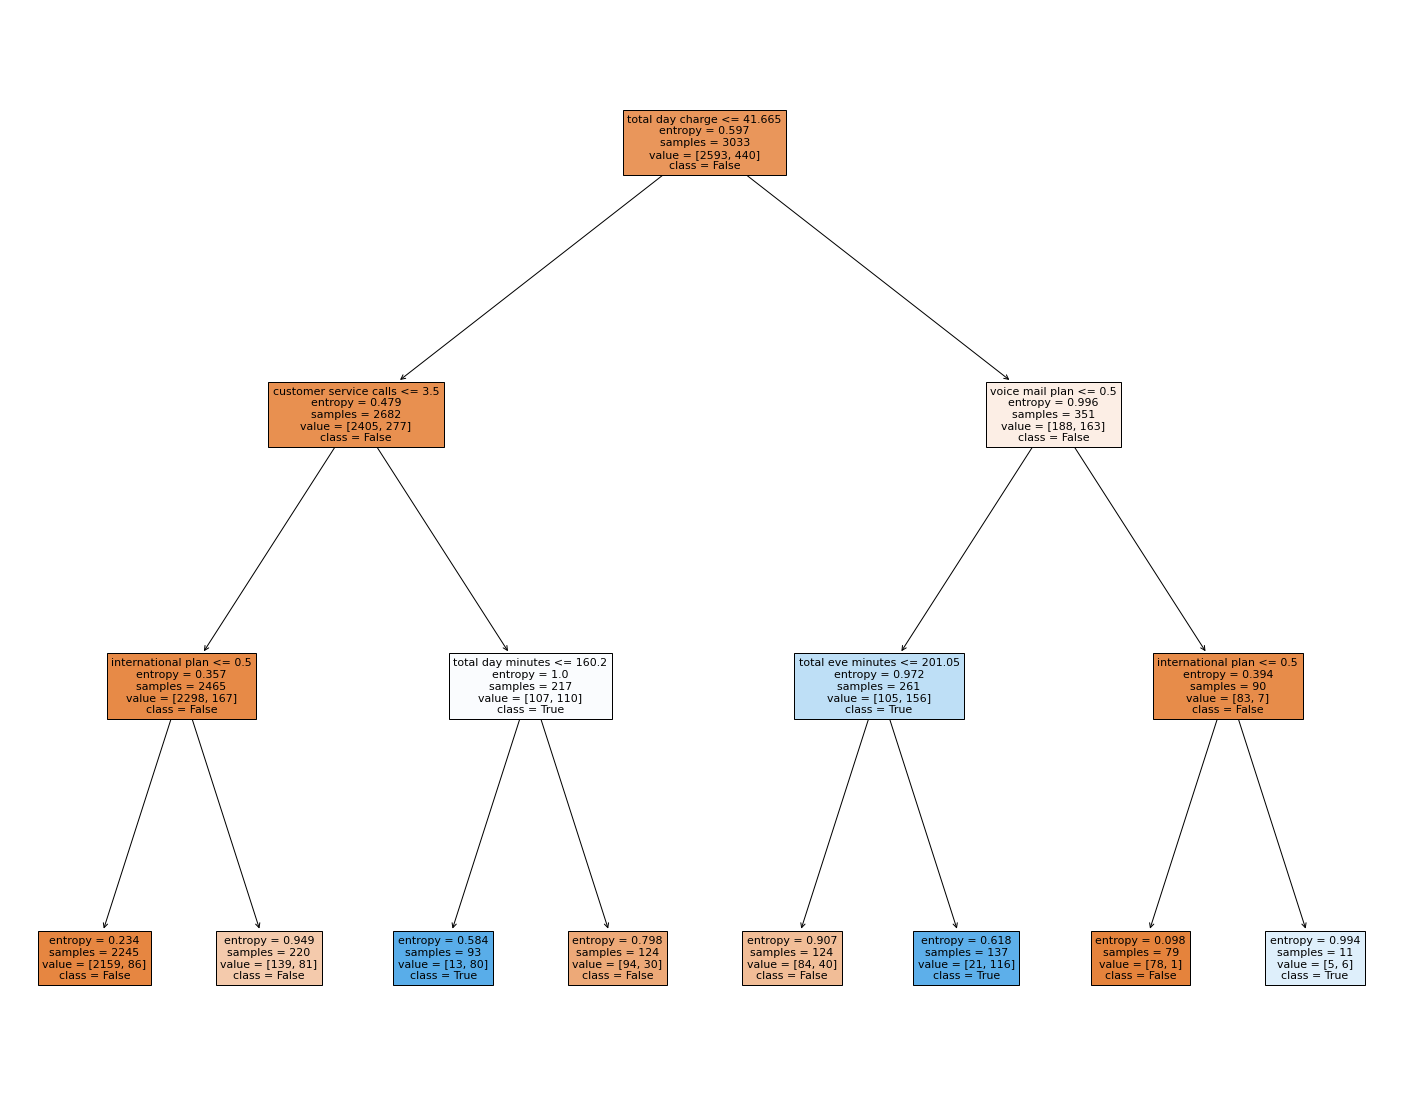

In [25]:
featureNames  = data.columns[0:17]
classNames = np.unique (data.iloc [:,17]).astype ('str')

fig = plt.figure(figsize=(25,20))
_ = skl.tree.plot_tree(tree, feature_names = featureNames, class_names = classNames, filled = True)